<a href="https://colab.research.google.com/github/data2kinyungu/spark_usecase/blob/main/pyspark_bundesliga_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=d5621d6b38d101c372039e2b84644a1091c06110d243ac3c1cc0e7354ac773e4
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
!pip install pyspark==3.3.0 py4j==0.10.9.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 10.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=e462200a50adfbfec48c9b75a7b23c1475653f5b2571522cfe2dd2bb2b108737
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
!apt install -y python3-pip
!apt install -y build-essential libssl-dev libffi-dev python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pkg-resources python3-secretstorage python3-setuptools python3-six
  python3-wheel python3-xdg
Suggested packages:
  python-crypto-doc python-cryptography-doc python3-cryptography-vectors
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0
  python-secretstorage-doc python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pip python3-pkg-resources python3-secretstorage python3-setuptools

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/19TGtcIdHv-yxKOLN4IftLWDA3TLinj1T/view?usp=sharing

required_file = drive.CreateFile({'id':'19TGtcIdHv-yxKOLN4IftLWDA3TLinj1T'})


In [ ]:
import pyforest

required_file.GetContentFile('matches.csv')

df = pd.read_csv('matches.csv')

df.head()

<IPython.core.display.Javascript object>

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [ ]:
#import the necessary modules

from pyspark import SparkContext
from pyspark.sql import SparkSession, Window, Row
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [ ]:
#use spark session entry point to spark

spark = SparkSession.builder.appName("matches_analysis").getOrCreate()

In [ ]:
#creating a dataframe

df_matches = spark.read.csv('matches.csv', header=True, inferSchema=True)


df_matches.limit(10).show()


+--------+---+------+-------------------+--------------+--------------+----+----+---+
|Match_ID|Div|Season|               Date|      HomeTeam|      AwayTeam|FTHG|FTAG|FTR|
+--------+---+------+-------------------+--------------+--------------+----+----+---+
|       1| D2|  2009|2010-04-04 00:00:00|    Oberhausen|Kaiserslautern|   2|   1|  H|
|       2| D2|  2009|2009-11-01 00:00:00|   Munich 1860|Kaiserslautern|   0|   1|  A|
|       3| D2|  2009|2009-10-04 00:00:00| Frankfurt FSV|Kaiserslautern|   1|   1|  D|
|       4| D2|  2009|2010-02-21 00:00:00| Frankfurt FSV|     Karlsruhe|   2|   1|  H|
|       5| D2|  2009|2009-12-06 00:00:00|         Ahlen|     Karlsruhe|   1|   3|  A|
|       6| D2|  2009|2010-04-03 00:00:00|  Union Berlin|     Karlsruhe|   1|   1|  D|
|       7| D2|  2009|2009-08-14 00:00:00|     Paderborn|     Karlsruhe|   2|   0|  H|
|       8| D2|  2009|2010-03-08 00:00:00|     Bielefeld|     Karlsruhe|   0|   1|  A|
|       9| D2|  2009|2009-09-26 00:00:00|Kaiserslauter

In [74]:

df_matches = df_matches.withColumnRenamed('HomeTeam', 'home_team') \
             .withColumnRenamed('AwayTeam', 'away_team') \
             .withColumnRenamed('FTHG', 'HomeTeamGoals') \
             .withColumnRenamed('FTAG', 'AwayTeamGoals') \
             .withColumnRenamed('FTR', 'FinalResult')
             

df_matches.limit(10).show()

+--------+---+------+-------------------+--------------+--------------+-------------+-------------+-----------+
|Match_ID|Div|Season|               Date|     home_team|     away_team|HomeTeamGoals|AwayTeamGoals|FinalResult|
+--------+---+------+-------------------+--------------+--------------+-------------+-------------+-----------+
|       1| D2|  2009|2010-04-04 00:00:00|    Oberhausen|Kaiserslautern|            2|            1|          H|
|       2| D2|  2009|2009-11-01 00:00:00|   Munich 1860|Kaiserslautern|            0|            1|          A|
|       3| D2|  2009|2009-10-04 00:00:00| Frankfurt FSV|Kaiserslautern|            1|            1|          D|
|       4| D2|  2009|2010-02-21 00:00:00| Frankfurt FSV|     Karlsruhe|            2|            1|          H|
|       5| D2|  2009|2009-12-06 00:00:00|         Ahlen|     Karlsruhe|            1|            3|          A|
|       6| D2|  2009|2010-04-03 00:00:00|  Union Berlin|     Karlsruhe|            1|            1|     

In [76]:
df_matches = df_matches \
    .withColumn('HomeTeamWin',
                when(col('FinalResult') == 'H', 1).otherwise(0)) \
    .withColumn('AwayTeamWin',
                when(col('FinalResult') == 'A', 1).otherwise(0)) \
    .withColumn('GameTie', 
                when(col('FinalResult') == 'D', 1).otherwise(0))


#bundesliga is a D1 division and we check in season <= 2010 and >= 2000
bundesliga = df_matches \
                    .filter((col('Season') >= 2000) & 
                            (col('Season') <= 2010) & 
                            (col('Div') == 'D1'))

# home team features
home = bundesliga.groupby('Season', 'home_team') \
       .agg(sum('HomeTeamWin').alias('TotalHomeWin'),
            sum('AwayTeamWin').alias('TotalHomeLoss'),
            sum('GameTie').alias('TotalHomeTie'),
            sum('HomeTeamGoals').alias('HomeScoredGoals'),
            sum('AwayTeamGoals').alias('HomeAgainstGoals')) \
       .withColumnRenamed('home_team', 'Team')

#away game features 
away =  bundesliga.groupby('Season', 'away_team') \
       .agg(sum('AwayTeamWin').alias('TotalAwayWin'),
            sum('HomeTeamWin').alias('TotalAwayLoss'),
            sum('GameTie').alias('TotalAwayTie'),
            sum('AwayTeamGoals').alias('AwayScoredGoals'),
            sum('HomeTeamGoals').alias('AwayAgainstGoals'))  \
       .withColumnRenamed('away_team', 'Team')




#season features 
##Then, inner join them on ‘Team’ and ‘Season’ fields to create a 
## single dataframe containing game level aggregation: table. 
## After that, I use a basic window function to further aggregate 
##game statistics on season level and rank them based on winning percentage
## and goal differentials. The reason why I added goal differentials is
## because it’s used as a tie-breaker in soccer.

window = ['Season']
window = Window.partitionBy(window) \
        .orderBy(col('WinPct').desc(), col('GoalDifferentials').desc())


table = home.join(away, ['Team', 'Season'],  'inner') \
    .withColumn('GoalsScored',
                col('HomeScoredGoals') + col('AwayScoredGoals')) \
    .withColumn('GoalsAgainst',
                col('HomeAgainstGoals') + col('AwayAgainstGoals')) \
    .withColumn('GoalDifferentials',
                col('GoalsScored') - col('GoalsAgainst')) \
    .withColumn('Win',
                col('TotalHomeWin') + col('TotalAwayWin')) \
    .withColumn('Loss',
                col('TotalHomeLoss') + col('TotalAwayLoss')) \
    .withColumn('Tie',
                col('TotalHomeTie') + col('TotalAwayTie')) \
    .withColumn('WinPct', round((100* col('Win')/(col('Win') \
                 + col('Loss') + col('Tie'))), 2)) \
    .drop('HomeScoredGoals',
          'AwayScoredGoals', 'HomeAgainstGoals', 'AwayAgainstGoals') \
    .drop('TotalHomeWin', 'TotalAwayWin', 'TotalHomeLoss',
          'TotalAwayLoss', 'TotalHomeTie', 'TotalAwayTie') \
    .withColumn('TeamPosition', rank().over(window)) 

table_df = table.filter(col('TeamPosition') == 1).orderBy(asc('Season')).show()
table_df


+-------------+------+-----------+------------+-----------------+---+----+---+------+------------+
|         Team|Season|GoalsScored|GoalsAgainst|GoalDifferentials|Win|Loss|Tie|WinPct|TeamPosition|
+-------------+------+-----------+------------+-----------------+---+----+---+------+------------+
|Bayern Munich|  2000|         62|          37|               25| 19|   9|  6| 55.88|           1|
|   Leverkusen|  2001|         77|          38|               39| 21|   7|  6| 61.76|           1|
|Bayern Munich|  2002|         70|          25|               45| 23|   5|  6| 67.65|           1|
|Werder Bremen|  2003|         79|          38|               41| 22|   4|  8| 64.71|           1|
|Bayern Munich|  2004|         75|          33|               42| 24|   5|  5| 70.59|           1|
|Bayern Munich|  2005|         67|          32|               35| 22|   3|  9| 64.71|           1|
|    Stuttgart|  2006|         61|          37|               24| 21|   6|  7| 61.76|           1|
|Bayern Mu

In [78]:
##Bundesliga winner from 2000 to 2010

window = ['Season']
window = Window.partitionBy(window).orderBy(col('WinPct').desc(), col('GoalDifferentials').desc())
table = home.join(away, ['Team', 'Season'],  'inner') \
    .withColumn('GoalsScored', col('HomeScoredGoals') + col('AwayScoredGoals')) \
    .withColumn('GoalsAgainst', col('HomeAgainstGoals') + col('AwayAgainstGoals')) \
    .withColumn('GoalDifferentials', col('GoalsScored') - col('GoalsAgainst')) \
    .withColumn('Win', col('TotalHomeWin') + col('TotalAwayWin')) \
    .withColumn('Loss', col('TotalHomeLoss') + col('TotalAwayLoss')) \
    .withColumn('Tie', col('TotalHomeTie') + col('TotalAwayTie')) \
    .withColumn('WinPct', round((100* col('Win')/(col('Win') + col('Loss') + col('Tie'))), 2)) \
    .drop('HomeScoredGoals', 'AwayScoredGoals', 'HomeAgainstGoals', 'AwayAgainstGoals') \
    .drop('TotalHomeWin', 'TotalAwayWin', 'TotalHomeLoss', 'TotalAwayLoss', 'TotalHomeTie', 'TotalAwayTie') \
    .withColumn('TeamPosition', rank().over(window)) 

table_df = table.filter(col('TeamPosition') == 1).orderBy(asc('Season')).toPandas()
table_df

,Team,Season,GoalsScored,GoalsAgainst,GoalDifferentials,Win,Loss,Tie,WinPct,TeamPosition
0,Bayern Munich,2000,62,37,25,19,9,6,55.88,1
1,Leverkusen,2001,77,38,39,21,7,6,61.76,1
2,Bayern Munich,2002,70,25,45,23,5,6,67.65,1
3,Werder Bremen,2003,79,38,41,22,4,8,64.71,1
4,Bayern Munich,2004,75,33,42,24,5,5,70.59,1
5,Bayern Munich,2005,67,32,35,22,3,9,64.71,1
6,Stuttgart,2006,61,37,24,21,6,7,61.76,1
7,Bayern Munich,2007,68,21,47,22,2,10,64.71,1
8,Wolfsburg,2008,80,41,39,21,7,6,61.76,1
9,Bayern Munich,2009,72,31,41,20,4,10,58.82,1


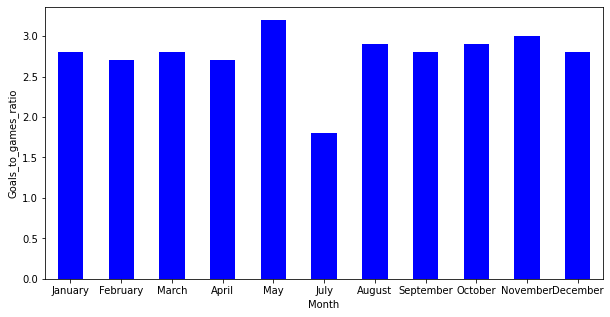

In [87]:
import calendar


october_period = df_matches \
                .filter(col('Div') == 'D1') \
                .filter((col('Season') >= 2000) &(col('Season') <= 2010)) \
                .withColumn('Month', month(col('Date'))) \
                .groupby('Month') \
                .agg(sum(col('HomeTeamGoals') \
                 + col('AwayTeamGoals')).alias('Goals'),
                     sum('GameTie').alias('GameTie'),
                     count(col('FinalResult')).alias('Total')) \
                .withColumn('Goals_to_games_ratio',
                            round(col('Goals')/col('Total'), 1)) \
                .withColumn('GameTie_to_games_ratio',
                            round(col('GameTie')/col('Total'), 1))

october_period = october_period.toPandas()

october_period_df = october_period.sort_values('Month')
october_period_df['Month'] = [calendar.month_name[val] 
                              for val in october_period_df.Month.tolist()]
october_period_df.set_index('Month', drop=True, inplace=True)
october_period_df['Goals_to_games_ratio'] \
               .plot.bar(rot=0, color='blue', figsize=(10, 5))
plt.ylabel('Goals_to_games_ratio')
plt.show()

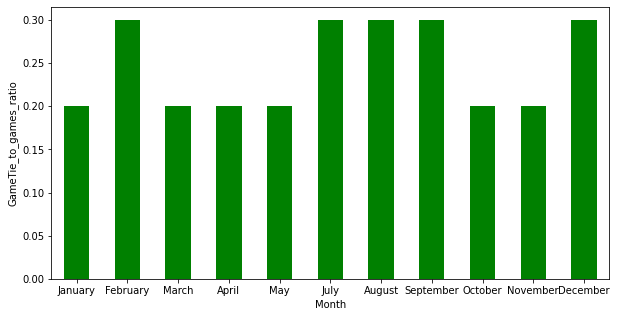

In [86]:
october_period_df['GameTie_to_games_ratio'].plot.bar(rot=0, color='green', figsize=(10, 5))
plt.ylabel('GameTie_to_games_ratio')
plt.show()